In [ ]:
# Importando las librerias
import numpy as np
from keras.datasets import imdb
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

Ahora podemos comenzar a explorar el conjunto de datos. Veamos de cuantos datos disponemos:

In [ ]:
# summarize size
print("dataset a entrenar: ")
print(X.shape)
print(y.shape)

dataset a entrenar: 
(50000,)
(50000,)


Podemos observar que tenemos en total unos 50000 ejemplos.
Podemos ver las clases que tenemos:

In [ ]:
# numero de clases
print("Clases: ")
print(np.unique(y))

Clases: 
[0 1]


Podemos ver en el resultado anterior que el conjunto de datos está etiquetado en dos categorías, 0 o 1, que representa el sentimiento de la revisión, bueno=1 y malo=0.

El conjunto de datos completo contiene 88585 palabras y la extensión promedio de la revisión es de 234 palabras, con una desviación estándar de 173 palabras. Esto podemos verlo con el código siguiente:

In [ ]:
# palabras únicas del conjunto de datos
print("número de palabras: ")
print(len(np.unique(np.hstack(X))))

número de palabras: 
88585


Con este código podemos ver la longitud media de las palabras:

In [ ]:
# Longitud
print("Longitud: ")
result = [len(x) for x in X]
print("Media %.2f palabras (%f)" % (np.mean(result), np.std(result)))

Longitud: 
Media 234.76 palabras (172.911495)


Ahora pintaremos un grafico de cajas y bigotes y el histograma de longitudes de palabras. Si observamos el gráfico de cajas y bigotes y el histograma de las longitudes, podemos ver una distribución exponencial que puede cubrir la masa de la distribución con una longitud recortada de 400 a 500 palabras.

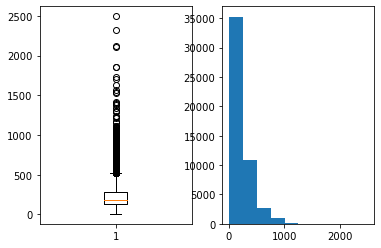

In [ ]:
# ploteamos la Longitud un boxplot y el histograma
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)
plt.show()

A continuación, vamos a ver qué aspecto tienen los ejemplos:

In [ ]:
print("Label:", y[0])

print(X[0])

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Como podemos observar en la imagen, el primer ejemplo está etiquetado como positivo (1). El
siguiente código recupera los índices de palabras de mapeo del diccionario en las palabras
originales para que podamos leerlas. Reemplaza cada palabra desconocida con un "#". Hace esto usando la función _get_word_index()_.

In [ ]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()])
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X[0]])
print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be

**¿COMO TRATARIAMOS ESTE PROBLEMA CON UNA RED FEEDFORWARD?**

Comenzaremos por importar las clases y funciones necesarias para este modelo e inicializar el generador de números aleatorios a un valor constante para asegurarnos de que podemos reproducir fácilmente los resultados.

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Embedding
from keras.preprocessing import sequence

# semilla aleatoria de reproducibilidad
seed = 7

np.random.seed(seed)

A continuación, cargaremos el conjunto de datos IMDB. Simplificaremos el conjunto de datos
usando “incrustraciones” de palabras. Sólo cargaremos las 5.000 primeras palabras de cada reseña.

Utilizaremos una división del 50%/50% del conjunto de datos para entrenamiento y test si utilizamos el código que a continuación se expone Si se desea utilizar otra distribución utilizar el código que se plantea en el apartado anterior para una distribución del 80/20.
Limitaremos las reseñas a 500 palabras, truncando las revisiones más largas y completando con 0 las revisiones más cortas.

In [ ]:
# carga del conjunto de datos pero sólo mantenemos las n palabras
# principales, cero el resto
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:
from keras.utils import pad_sequences
max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words)
X_test = pad_sequences(X_test, maxlen=max_words)

Ahora podemos crear nuestro modelo. Usaremos una capa de embedding como capa de entrada,
estableciendo el vocabulario en 5.000, el tamaño del vector de palabra con 32 dimensiones y la longitud de entrada (input_legth) de 500.


Aplanaremos la salida de las capas de embedding a una dimensión, luego usaremos una capa oculta densa de 250 unidades con función de activación de relu. La capa de salida tiene una neurona y usará una activación sigmoide con valores de salida de 0 y 1 como predicciones. El modelo utiliza el error logarítmico y se optimiza mediante el procedimiento de optimización de ADAM.

In [ ]:
# creamos el modelo, recordad que:
# el número máximo de palabras del lexicón que usaremos seran 5000
# que la longitud máxima del parrafo es 500 y
# la dimension del espacio  que se transforma cada palabra es 32
# Estos son los parametros del Embedding y por tanto la entrada a la
# red estará formada por 500*32


model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 250)               4000250   
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                                 
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
157/157 [==============================] - 22s 124ms/step - loss: 0.4902 - accuracy: 0.7354 - val_loss: 0.2996 - val_accuracy: 0.8784
Epoch 2/10
157/157 [========

Utilizaremos el conjunto test como validación durante el entrenamiento. Este modelo se
sobreajusta muy rápidamente por lo que utilizaremos muy pocas épocas de entrenamiento, en este caso sólo 2. Hay muchos datos por lo que utilizaremos un tamaño de lote de 128. Después de que el modelo se ha entrenado, evaluaremos su precisión sobre el conjunto de test.

In [ ]:
# ajustamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)

# Evaluación final del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precisión: %.2f%%" % (scores[1]*100))

Epoch 1/2
196/196 [==============================] - 27s 136ms/step - loss: 0.1336 - accuracy: 0.9574 - val_loss: 0.4189 - val_accuracy: 0.8607
Epoch 2/2
196/196 [==============================] - 27s 137ms/step - loss: 0.0136 - accuracy: 0.9961 - val_loss: 0.6019 - val_accuracy: 0.8558
Precisión: 85.58%


A continuación, se presenta un código para poder representar gráficamente la evolución tanto del
error y el tanto por ciento de aciertos del conjunto de entrenamiento y validación:

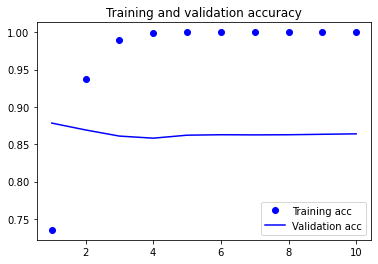

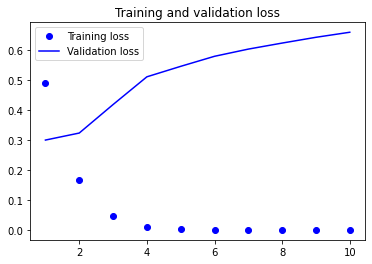

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**¿COMO TRATARIAMOS ESTE PROBLEMA CON UNA RED RECURRENTE?**

Únicamente habrá que sustituir la parte del código asociado a la red, el resto del código será el mismo.

En esta parte diseñamos la red neuronal:

In [ ]:
from keras.layers import SimpleRNN
# creamos el modelo
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(SimpleRNN(50))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 60s 353ms/step - loss: 0.5984 - accuracy: 0.6640 - val_loss: 0.4192 - val_accuracy: 0.8212
Epoch 2/10
157/157 [==============================] - 55s 347ms/step - loss: 0.3780 - accuracy: 0.8417 - val_loss: 0.3867 - val_accuracy: 0.8346
Epoch 3/10
157/157 [==============================] - 54s 344ms/step - loss: 0.3054 - accuracy: 0.8748 - val_loss: 0.3734 - val_accuracy: 0.8380
Epoch 4/10
157/157 [==============================] - 57s 366ms/step - loss: 0.2663 - accuracy: 0.8942 - val_loss: 0.4162 - val_accuracy: 0.8188
Epoch 5/10
157/157 [==============================] - 54s 346ms/step - loss: 0.2119 - accuracy: 0.9204 - val_loss: 0.4368 - val_accuracy: 0.8064
Epoch 6/10
157/157 [==============================] - 56s 354ms/step - loss: 0.1677 - accuracy: 0.9360 - val_loss: 0.6466 - val_accuracy: 0.7354
Epoch 7/10
157/157 [==============================] - 54s 347ms/step - loss: 0.1292 - accuracy: 0.9517 - val_loss: 0.5051 - val_ac

A continuación, entrenamos la red y evaluamos con el conjunto test:

In [ ]:
# ajustamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)

# Evaluación final del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precisión: %.2f%%" % (scores[1]*100))

Epoch 1/2
196/196 [==============================] - 81s 415ms/step - loss: 0.1711 - accuracy: 0.9445 - val_loss: 0.5093 - val_accuracy: 0.8250
Epoch 2/2
196/196 [==============================] - 83s 426ms/step - loss: 0.1230 - accuracy: 0.9572 - val_loss: 0.5611 - val_accuracy: 0.8094
Precisión: 80.94%


La visualización de los resultados, se haría de manera análoga al apartado anterior.

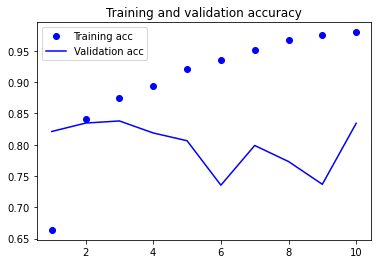

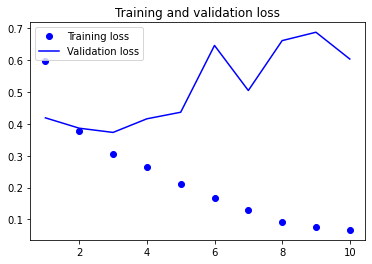

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**¿COMO TRATARIAMOS ESTE PROBLEMA CON UNA RED RECURRENTE LSTM?**

Al igual que en el caso anterior con respecto al código, únicamente habrá que sustituir la parte del código asociado a la red, el resto del código será el mismo.

En esta parte diseñamos la red LSTM:

In [ ]:
from keras.layers import LSTM
# creamos el modelo
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(LSTM(50))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 129s 770ms/step - loss: 0.5107 - accuracy: 0.7527 - val_loss: 0.3353 - val_accuracy: 0.8620
Epoch 2/10
157/157 [==============================] - 124s 790ms/step - loss: 0.3209 - accuracy: 0.8688 - val_loss: 0.3059 - val_accuracy: 0.8766
Epoch 3/10
157/157 [==============================] - 120s 765ms/step - loss: 0.2648 - accuracy: 0.8953 - val_loss: 0.3837 - val_accuracy: 0.8400
Epoch 4/10
157/157 [==============================] - 120s 768ms/step - loss: 0.2435 - accuracy: 0.9069 - val_loss: 0.3153 - val_accuracy: 0.8814
Epoch 5/10
157/157 [==============================] - 124s 792ms/step - loss: 0.2242 - accuracy: 0.9141 - val_loss: 0.3238 - val_accuracy: 0.8762
Epoch 6/10
157/157 [==============================] - 119s 759ms/step - loss: 0.2123 - accuracy: 0.9204 - val_loss: 0.2964 - val_accuracy: 0.8808
Epoch 7/10
157/157 [==============================] - 121s 771ms/step - loss: 0.1952 - accuracy: 0.9272 - val_loss: 0.3567 -

A continuación, entrenamos la red LSTM y evaluamos con el conjunto test:

In [ ]:
# ajustamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)

# Evaluación final del modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Precisión: %.2f%%" % (scores[1]*100))

Epoch 1/2
196/196 [==============================] - 209s 1s/step - loss: 0.1988 - accuracy: 0.9273 - val_loss: 0.5270 - val_accuracy: 0.8320
Epoch 2/2
196/196 [==============================] - 238s 1s/step - loss: 0.1894 - accuracy: 0.9296 - val_loss: 0.3170 - val_accuracy: 0.8726
Precisión: 87.26%


Realizados estos pasos, ya podemos visualizar los resultados haciéndolo de manera análoga a los
casos anteriores.

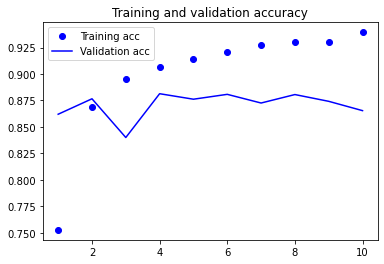

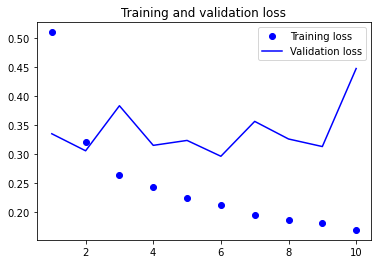

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Pruebas con red feedforward

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score
import pandas as pd

df = pd.DataFrame(columns=[])

epocas = [4, 6, 8]
neuronas = [250, 300, 350]

for i in range(len(neuronas)):
    for j in range(len(epocas)):
        model = Sequential()
        model.add(Embedding(top_words, 32, input_length=max_words))
        model.add(Flatten())
        model.add(Dense(neuronas[i], activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epocas[j], batch_size=128, verbose=0)

        scores = model.evaluate(X_test, y_test, verbose=0)
        print("Exactitud: %.2f%%" % (scores[1]*100))

        y_pred = model.predict(X_test)
        y_pred=(y_pred>0.5)

        datos = {
            'Número de capas ocultas': 1,
            'Unidades ocultas en la(s) capa(s) oculta(s)': neuronas[i],
            'Tipo de capas': 'Dense',
            'Iteraciones (Épocas)': epocas[j],
            'Batch size': 128,
            'Función de activación': "ReLU",
            'Precisión': precision_score(y_test, y_pred),
            'F1': f1_score(y_test,y_pred),
            'Recall': recall_score(y_test, y_pred),
            'Coeficiente kappa': cohen_kappa_score(y_test, y_pred)
        }

        datos = pd.DataFrame([datos])
        df = pd.concat([df, datos], ignore_index=True)
print(df)

Exactitud: 86.64%
782/782 [==============================] - 11s 14ms/step
Exactitud: 86.18%
782/782 [==============================] - 10s 13ms/step
Exactitud: 86.50%
782/782 [==============================] - 11s 13ms/step
Exactitud: 86.52%
782/782 [==============================] - 9s 12ms/step
Exactitud: 86.35%
782/782 [==============================] - 11s 13ms/step
Exactitud: 86.61%
782/782 [==============================] - 11s 13ms/step
Exactitud: 86.39%
782/782 [==============================] - 14s 17ms/step
Exactitud: 86.24%
782/782 [==============================] - 11s 14ms/step
Exactitud: 86.65%
782/782 [==============================] - 11s 13ms/step
   Número de capas ocultas  Unidades ocultas en la(s) capa(s) oculta(s)  \
0                        1                                          250   
1                        1                                          250   
2                        1                                          250   
3                        1

### Pruebas con red recurrente

In [ ]:
epocas = [6, 10, 12]
neuronas = [30, 50, 100]

df_2 = pd.DataFrame(columns=[])

for i in range(len(neuronas)):
    for j in range(len(epocas)):
        model = Sequential()
        model.add(Embedding(top_words, 32, input_length=max_words))
        model.add(SimpleRNN(neuronas[i]))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epocas[j], batch_size=128, verbose=0)

        scores = model.evaluate(X_test, y_test, verbose=0)
        print("Exactitud: %.2f%%" % (scores[1]*100))

        y_pred = model.predict(X_test)
        y_pred=(y_pred>0.5)


        datos_2 = {
            'Número de capas ocultas': 1,
            'Unidades ocultas en la(s) capa(s) oculta(s)': neuronas[i],
            'Tipo de capas': 'Dense',
            'Iteraciones (Épocas)': epocas[j],
            'Batch size': 128,
            'Función de activación': "ReLU",
            'Precisión': precision_score(y_test, y_pred),
            'F1': f1_score(y_test,y_pred),
            'Recall': recall_score(y_test, y_pred),
            'Coeficiente kappa': cohen_kappa_score(y_test, y_pred)
        }

        datos_2 = pd.DataFrame([datos_2])
        df_2 = pd.concat([df_2, datos_2], ignore_index=True)
print(df_2)

Exactitud: 85.98%
782/782 [==============================] - 40s 50ms/step
Exactitud: 81.85%
782/782 [==============================] - 41s 52ms/step
Exactitud: 84.31%
782/782 [==============================] - 42s 52ms/step
Exactitud: 80.50%
782/782 [==============================] - 54s 69ms/step
Exactitud: 81.73%
782/782 [==============================] - 56s 71ms/step
Exactitud: 76.72%
782/782 [==============================] - 56s 71ms/step
Exactitud: 80.27%
782/782 [==============================] - 69s 87ms/step
Exactitud: 82.98%
782/782 [==============================] - 68s 87ms/step
Exactitud: 82.67%
782/782 [==============================] - 69s 88ms/step
   Número de capas ocultas  Unidades ocultas en la(s) capa(s) oculta(s)  \
0                        1                                           30   
1                        1                                           30   
2                        1                                           30   
3                        

### Pruebas con red recurrente tipo LSTM

In [ ]:
epocas = [6, 10, 12]
neuronas = [30, 50, 100]

df_3 = pd.DataFrame(columns=[])

for i in range(len(neuronas)):
    for j in range(len(epocas)):
        model = Sequential()
        model.add(Embedding(top_words, 32, input_length=max_words))
        model.add(LSTM(neuronas[i]))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epocas[j], batch_size=128, verbose=0)

        scores = model.evaluate(X_test, y_test, verbose=0)
        print("Exactitud: %.2f%%" % (scores[1]*100))

        y_pred = model.predict(X_test)
        y_pred=(y_pred>0.5)


        datos_3 = {
            'Número de capas ocultas': 1,
            'Unidades ocultas en la(s) capa(s) oculta(s)': neuronas[i],
            'Tipo de capas': 'Dense',
            'Iteraciones (Épocas)': epocas[j],
            'Batch size': 128,
            'Función de activación': "ReLU",
            'Precisión': precision_score(y_test, y_pred),
            'F1': f1_score(y_test,y_pred),
            'Recall': recall_score(y_test, y_pred),
            'Coeficiente kappa': cohen_kappa_score(y_test, y_pred)
        }

        datos_3 = pd.DataFrame([datos_3])
        df_3 = pd.concat([df_3, datos_3], ignore_index=True)
print(df_3)

Exactitud: 84.92%
782/782 [==============================] - 70s 88ms/step
Exactitud: 83.18%
782/782 [==============================] - 68s 85ms/step
Exactitud: 86.43%
782/782 [==============================] - 70s 87ms/step
Exactitud: 85.45%
782/782 [==============================] - 88s 110ms/step
Exactitud: 83.96%
782/782 [==============================] - 88s 110ms/step
Exactitud: 87.14%
782/782 [==============================] - 88s 110ms/step
Exactitud: 85.17%
782/782 [==============================] - 130s 165ms/step
Exactitud: 87.87%
782/782 [==============================] - 133s 168ms/step
Exactitud: 86.80%
782/782 [==============================] - 132s 167ms/step
   Número de capas ocultas  Unidades ocultas en la(s) capa(s) oculta(s)  \
0                        1                                           30   
1                        1                                           30   
2                        1                                           30   
3               

Se han realizado pruebas con los distintos modelos presentados. El primer modelo se trata de una red feedforward. Este modelo se caracteriza por proporcionar resultados muy estables ya que su rendimiento no se ve gravemente afectado por el cambio en el número de neuronas o iteraciones. Es un buen modelo para este problema, ya que proporciona una alta precisión y recall sin tener que afinar excesivamente los parámetros de la red y se entrena en un corto periodo de tiempo. Por otro lado también se ha trabajado con una red neuronal recurrente. Este modelo ha tardado más en entrenarse y sus medidas de rendimiento son notablemente peores que las obtenidas por la red feedforward. Personalmente no utilizaría este modelo de red para este problema. Por último se ha entrenado una red neuronal recurrente tipo LSTM que aunque haya sido el modelo que más ha tardado en entrenarse sus resultados son mejores que las dos redes anteriormente implementadas. En algunos casos se ha obtenido un 90% de precisión con un un recall bastante alto, esto significa que el modelo se podría volver a implementar para otros conjuntos de datos nuevos y haría una buena predicción.
Se ha intentado recoger datos para otros modelos de redes neuronales con más capas ocultas pero debido al tiempo que llevaba para entrenarse y el rendimiento que proporcionaban se ha optado por no incluirlas en este guión.